In [1]:
from windisch import *
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
#update_input_parameters()
tip = TurbinesInputParameters()
tip.static()
#tip.stochastic(3)
_, array = fill_xarray_from_input_parameters(
    tip,
    scope={"year": [2020, ], "size": [1000,]}
)

In [3]:
fp = "/Users/romain/GitHub/windisch/dev/era5_mean_2013-2022_month_by_hour_corrected.nc"

In [4]:
wt = WindTurbineModel(
    array,
    location=(55.602164360115104, 12.491974627997108),
    wind_data=xr.open_dataset(fp),
    #power_curve_model="Dai et al. 2016",
    #country="DK"
)

Fetching terrain data only.
Using cached data for location (55.602164360115104, 12.491974627997108)
Onshore wind turbines


/Users/romain/GitHub/windisch/windisch/wind_speed.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_range = pd.date_range("2024-01-01", "2024-12-31 23:00", freq="H")


In [5]:
wt.set_all()

In [7]:
wt.power_curve.sel(application="onshore")

<xarray.DataArray (size: 1, year: 1, value: 1, wind speed: 31)> Size: 248B
array([[[[   0.        ,    0.        ,    0.        ,    8.43263728,
            42.30015392,   94.74674925,  164.01693712,  260.45282145,
           388.780888  ,  553.55716279,  759.33767187, 1000.        ,
          1000.        , 1000.        , 1000.        , 1000.        ,
          1000.        , 1000.        , 1000.        , 1000.        ,
          1000.        , 1000.        , 1000.        , 1000.        ,
          1000.        , 1000.        , 1000.        , 1000.        ,
          1000.        , 1000.        , 1000.        ]]]])
Coordinates:
  * size         (size) int64 8B 1000
    application  <U8 32B 'onshore'
  * year         (year) int64 8B 2020
  * value        (value) int64 8B 0
  * wind speed   (wind speed) int64 248B 0 1 2 3 4 5 6 ... 24 25 26 27 28 29 30

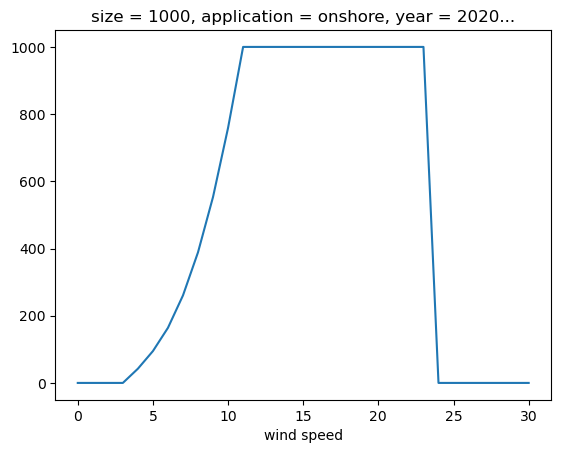

In [10]:
wt.power_curve.sel(application="onshore", year=2020).plot()

In [44]:
wt["average load factor"]

<xarray.DataArray (size: 1, application: 2, year: 1, value: 1)> Size: 16B
array([[[[       nan]],

        [[0.14141094]]]])
Coordinates:
  * size         (size) int64 8B 1000
  * application  (application) <U8 64B 'offshore' 'onshore'
    parameter    <U36 144B 'average load factor'
  * year         (year) int64 8B 2020
  * value        (value) int64 8B 0

In [53]:
from windisch import *
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:25832", "EPSG:4326", always_xy=True)

In [54]:
dk = pd.read_excel("/Users/romain/GitHub/windisch/dev/danish_wind_turbine_registry.xlsx", header=13)

In [55]:
dk = dk.iloc[:, [3, 12, 13, 55, 56, 57, 58, 59, 60, 61]]
dk.columns = [
    "Power (kW)",
    "X",
    "Y",
    "Production 2017",
    "Production 2018",
    "Production 2019",
    "Production 2020",
    "Production 2021",
    "Production 2022",
    "Production 2023"
]
dk["Production"] = dk[[
    "Production 2017",
    "Production 2018",
    "Production 2019",
    "Production 2020",
    "Production 2021",
    "Production 2022",
    "Production 2023"
]].mean(skipna=True, axis=1)

dk = dk.loc[dk["Production"] > 1e3]
dk = dk.loc[dk["X"] > 0]
dk = dk.loc[dk["Power (kW)"] > 100]

dk["Load factor"] = dk["Production"] / (dk["Power (kW)"] * 8760)

In [56]:
dk

,Power (kW),X,Y,Production 2017,Production 2018,Production 2019,Production 2020,Production 2021,Production 2022,Production 2023,Production,Load factor
3,660.0,719969.480,6167336.840,1320777.751,1.215273e+06,1.085841e+06,1.320225e+06,1.028473e+06,9.795441e+05,1.033811e+06,1.140564e+06,0.197275
4,660.0,720030.960,6167484.400,1170279.565,1.087014e+06,1.177463e+06,1.271935e+06,9.656586e+05,1.135906e+06,1.100627e+06,1.129840e+06,0.195420
6,660.0,704169.610,6199822.890,1028594.674,8.655286e+05,9.757116e+05,1.019166e+06,7.741376e+05,8.464748e+05,9.421950e+05,9.216869e+05,0.159417
7,660.0,704220.190,6199963.040,994858.067,8.672580e+05,9.097876e+05,7.177789e+05,7.456407e+05,8.419210e+05,9.714062e+05,8.640929e+05,0.149456
8,660.0,704270.050,6200105.680,1048761.619,8.572089e+05,8.979317e+05,9.965177e+05,7.338632e+05,8.206220e+05,7.092352e+05,8.663058e+05,0.149838
...,...,...,...,...,...,...,...,...,...,...,...,...
10637,7000.0,454407.000,6280817.000,NaN,2.429400e+07,2.980380e+07,2.970494e+07,2.675124e+07,2.963768e+07,2.632086e+07,2.775209e+07,0.452578
10639,7000.0,454153.000,6281691.000,NaN,2.429400e+07,2.980380e+07,2.970494e+07,2.675124e+07,2.963768e+07,2.632086e+07,2.775209e+07,0.452578
10658,5600.0,457413.000,6209509.000,NaN,NaN,NaN,9.845000e+03,1.455912e+07,1.967407e+07,2.260760e+07,1.421266e+07,0.289723
10659,5600.0,457512.000,6208823.000,NaN,NaN,NaN,9.845000e+03,1.455912e+07,1.967407e+07,2.260760e+07,1.421266e+07,0.289723


In [57]:
dk = dk.sort_values(by="Power (kW)", ascending=False)

In [58]:
# Convert X, Y to Longitude (LON) and Latitude (LAT)
def convert_to_lat_lon(row):
    if pd.notnull(row['X']) and pd.notnull(row['Y']):
        lon, lat = transformer.transform(row['X'], row['Y'])
        return pd.Series([lon, lat])
    else:
        return pd.Series([None, None])

dk[['LAT', 'LON']] = dk.apply(convert_to_lat_lon, axis=1)

In [59]:
dk

,Power (kW),X,Y,Production 2017,Production 2018,Production 2019,Production 2020,Production 2021,Production 2022,Production 2023,Production,Load factor,LAT,LON
5108,15000.0,492926.99,6325569.19,NaN,NaN,NaN,NaN,NaN,6.00,31295942.00,1.564797e+07,0.119087,8.883338,57.073460
5109,15000.0,492926.99,6323769.20,NaN,NaN,NaN,NaN,NaN,0.00,20691661.00,1.034583e+07,0.078735,8.883389,57.057290
5106,14000.0,492928.99,6323167.20,NaN,NaN,NaN,NaN,NaN,44130734.00,45083358.00,4.460705e+07,0.363723,8.883438,57.051882
5087,10000.0,492926.99,6322569.20,NaN,NaN,0.000,22918874.00,34855990.00,31479179.00,24734671.00,2.279774e+07,0.260248,8.883422,57.046510
5266,9525.0,469033.00,6145290.00,NaN,10567139.50,786640.600,NaN,NaN,NaN,NaN,5.676890e+06,0.068036,8.510371,55.452805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,130.0,869314.34,6126281.78,2910.625,0.00,25280.565,0.00,3.82,45794.20,121700.67,2.795570e+04,0.024548,14.797729,55.144998
596,130.0,869201.84,6126511.05,0.000,0.00,36488.820,29695.13,14571.17,42035.59,28820.55,2.165875e+04,0.019019,14.796271,55.147131
4145,130.0,603513.41,6084151.81,446006.320,365502.21,405492.900,423374.84,356767.68,393277.94,404039.15,3.992087e+05,0.350552,10.613999,54.893667
3995,130.0,556705.43,6081271.48,25953.200,NaN,NaN,NaN,NaN,NaN,NaN,2.595320e+04,0.022790,9.883731,54.875288


In [60]:
import numpy as np
fp = "/Users/romain/GitHub/windisch/dev/era5_mean_2013-2022_month_by_hour_corrected.nc"
def get_load_factor(row):
    models = [
        "Slootweg et al. 2003",
        "Heier 2009",
        "Thongam et al. 2009",
        "De Kooning et al. 2010",
        "Ochieng et Manyonge 2014",
        "Dai et al. 2016",
    ]

    load_factors = []

    for model in models:
        tip = TurbinesInputParameters()
        tip.static()
        _, array = fill_xarray_from_input_parameters(
            tip,
            scope={"year": [2020, ],}
        )
        array = array.interp(size=[row["Power (kW)"]], kwargs={"fill_value": "extrapolate"},)
        wt = WindTurbineModel(
            array,
            location=(row["LON"], row["LAT"]),
            wind_data=xr.open_dataset(fp),
            power_curve_model=model
        )
        wt.set_all()
        load_factors.append(np.squeeze(np.nan_to_num(wt["average load factor"].values, 0)).max().item(0))
    return load_factors


In [61]:
dk[[
    "Slootweg et al. 2003",
    "Heier 2009",
    "Thongam et al. 2009",
    "De Kooning et al. 2010",
    "Ochieng et Manyonge 2014",
    "Dai et al. 2016"
]] = None
columns_to_check = [
    "Production 2017", "Production 2018", "Production 2019",
    "Production 2020", "Production 2021", "Production 2022", 
    "Production 2023"
]

# Filter rows where all the specified columns have non-NaN values
dk = dk.dropna(subset=columns_to_check, how="any")

# dk.iloc[:2, -6:] = dk.iloc[:2, :].apply(get_load_factor, axis=1)
# Assuming get_load_factor(row) returns a list of 6 floats
rows = 20
dk.iloc[:rows, -6:] = pd.DataFrame(dk.iloc[:rows, :].apply(get_load_factor, axis=1).to_list(), index=dk.index[:rows])


Fetching terrain data only.
Using cached data for location (55.45280520510544, 8.510371088004975)
Offshore wind turbines
Fetching terrain data only.
Using cached data for location (55.45280520510544, 8.510371088004975)
Offshore wind turbines
Fetching terrain data only.
Using cached data for location (55.45280520510544, 8.510371088004975)
Offshore wind turbines
Fetching terrain data only.
Using cached data for location (55.45280520510544, 8.510371088004975)
Offshore wind turbines
Fetching terrain data only.
Using cached data for location (55.45280520510544, 8.510371088004975)
Offshore wind turbines
Fetching terrain data only.
Using cached data for location (55.45280520510544, 8.510371088004975)
Offshore wind turbines
Fetching terrain data only.
Using cached data for location (55.451929604605624, 8.518429780308034)
Onshore wind turbines
Fetching terrain data only.
Using cached data for location (55.451929604605624, 8.518429780308034)
Onshore wind turbines
Fetching terrain data only.
Usin

In [35]:
dk.to_excel("CF_prediction.xlsx")

Slootweg et al. 2003 Mean Absolute Percentage Error (MAPE): 15.52%
Heier 2009 Mean Absolute Percentage Error (MAPE): 20.94%
Thongam et al. 2009 Mean Absolute Percentage Error (MAPE): 8.97%
De Kooning et al. 2010 Mean Absolute Percentage Error (MAPE): 15.64%
Ochieng et Manyonge 2014 Mean Absolute Percentage Error (MAPE): 20.94%
Dai et al. 2016 Mean Absolute Percentage Error (MAPE): 11.87%


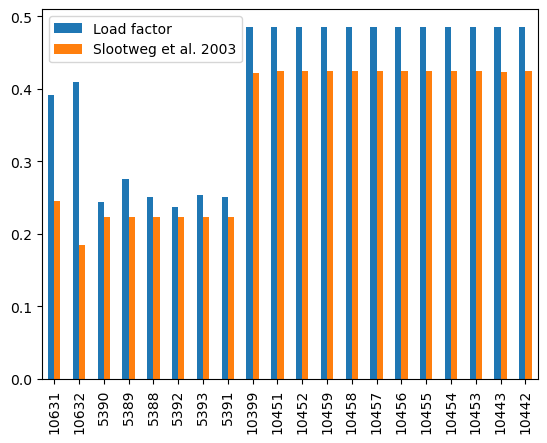

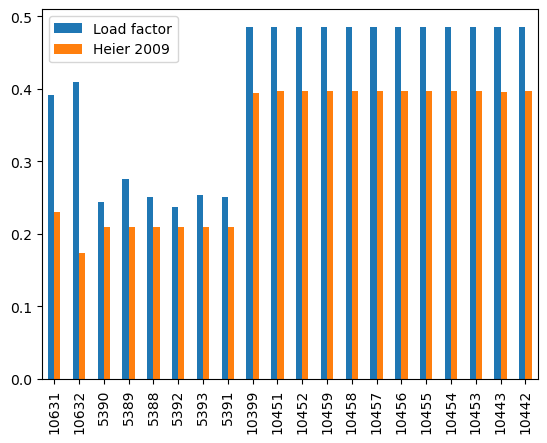

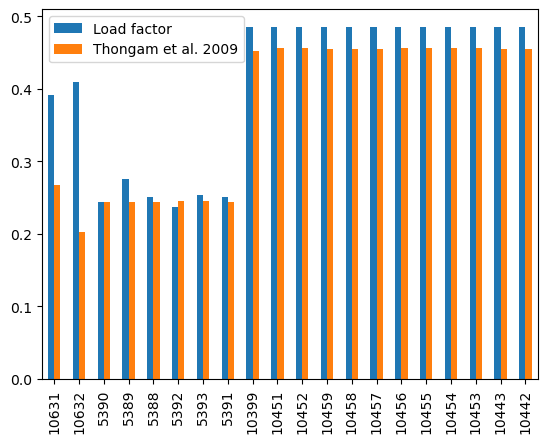

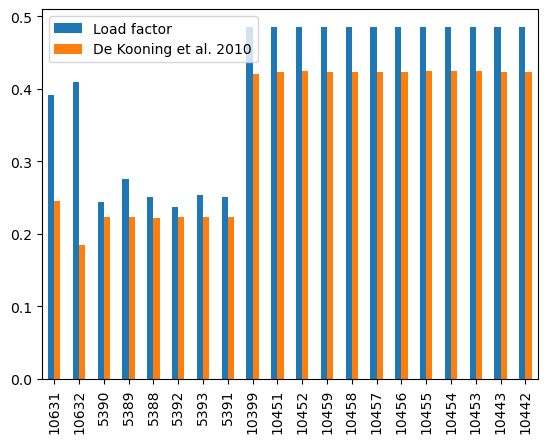

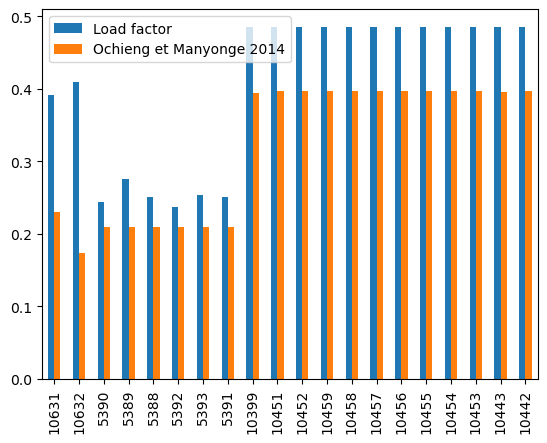

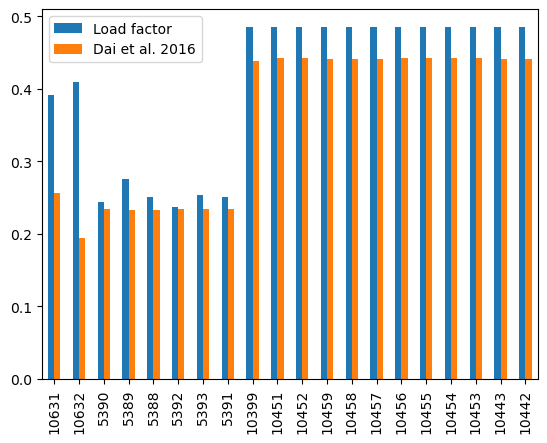

In [62]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = [
    "Slootweg et al. 2003",
    "Heier 2009",
    "Thongam et al. 2009",
    "De Kooning et al. 2010",
    "Ochieng et Manyonge 2014",
    "Dai et al. 2016",
]

for model in models:

    # Extract the actual and predicted load factors
    actual = dk["Load factor"]
    predicted = dk[model]
    
    # Drop rows where either value is NaN
    mask = ~actual.isna() & ~predicted.isna() & actual > 0
    actual = actual[mask]
    predicted = predicted[mask]
    
    # Compute metrics
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100  # In percentage
    r2 = r2_score(actual, predicted)
    
    # Display the metrics
    #print(f"Mean Absolute Error (MAE): {mae:.4f}")
    #print(f"Mean Squared Error (MSE): {mse:.4f}")
    #print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"{model} Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    #print(f"R² (Coefficient of Determination): {r2:.4f}")
    dk.loc[dk[model] > 0, ["Load factor", model]].plot(kind="bar")


In [9]:
dk

,Power (kW),X,Y,Production 2017,Production 2018,Production 2019,Production 2020,Production 2021,Production 2022,Production 2023,Production,Load factor,LAT,LON,Slootweg et al. 2003,Heier 2009,Thongam et al. 2009,De Kooning et al. 2010,Ochieng et Manyonge 2014,Dai et al. 2016
126,550.0,651502.14,6063736.82,1.052915e+06,7.861834e+05,5.486083e+05,9.720462e+05,7.566960e+05,1.028113e+06,9.990504e+05,8.776589e+05,0.207358,11.350988,54.698121,0.16976,0.158127,0.184679,0.169508,0.158127,0.177584
123,550.0,650982.72,6063943.94,1.159037e+06,9.178330e+05,1.050238e+06,1.073924e+06,1.606268e+05,5.652306e+05,1.051255e+06,8.540206e+05,0.218193,11.343042,54.700137,0.168906,0.157331,0.183749,0.168654,0.157331,0.17669
676,550.0,677825.07,6087308.59,1.264019e+06,1.037441e+06,1.146789e+06,1.166704e+06,9.942645e+05,1.112872e+06,1.087185e+06,1.115611e+06,0.225651,11.773433,54.901102,0.196142,0.1827,0.213379,0.19585,0.1827,0.205182
677,550.0,677830.67,6087156.56,1.332692e+06,1.082480e+06,1.248162e+06,1.190312e+06,1.028937e+06,1.104627e+06,1.008226e+06,1.142205e+06,0.209262,11.773427,54.899735,0.195368,0.181979,0.212536,0.195077,0.181979,0.204372
775,550.0,648892.75,6132580.14,1.029505e+06,8.732544e+05,9.923434e+05,9.730727e+05,7.301668e+05,8.616032e+05,9.077490e+05,9.096706e+05,0.188408,11.346360,55.317043,0.17443,0.162476,0.189758,0.17417,0.162476,0.182469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,6000.0,454455.91,6227232.51,1.691074e+07,1.351574e+07,1.281038e+07,1.104800e+07,7.788710e+06,1.254838e+07,1.270909e+07,1.247586e+07,0.241802,8.266179,56.187878,None,None,None,None,None,None
5393,6000.0,454283.34,6227493.77,1.743125e+07,1.394537e+07,1.385049e+07,1.134359e+07,8.461150e+06,1.432859e+07,1.419402e+07,1.336492e+07,0.270054,8.263353,56.190208,None,None,None,None,None,None
5391,6000.0,454635.85,6226960.92,1.708746e+07,1.353214e+07,1.270737e+07,1.130340e+07,8.604240e+06,1.361101e+07,1.528509e+07,1.316153e+07,0.290812,8.269124,56.185455,None,None,None,None,None,None
10631,8000.0,469033.00,6145290.00,3.116791e+07,1.866734e+07,2.979924e+07,3.084873e+07,2.583465e+07,2.887288e+07,2.719114e+07,2.748313e+07,0.388001,8.510371,55.452805,None,None,None,None,None,None


In [21]:
import xarray as xr

ds = xr.open_dataset("/Users/romain/GitHub/windisch/dev/era5_mean_2013-2022_month_by_hour.nc")
corr = xr.open_dataset("/Users/romain/GitHub/windisch/dev/ratio_gwa2_era5.nc")

In [23]:
ds.sum()

<xarray.Dataset> Size: 108B
Dimensions:      ()
Coordinates:
    spatial_ref  int64 8B 0
    variable     <U23 92B 'ratio_gwa2_era5_mean_WS'
Data variables:
    wind_speed   float64 8B 1.957e+08

In [18]:
ds.coords

Coordinates:
  * hour         (hour) int16 48B 0 1 2 3 4 5 6 7 8 ... 16 17 18 19 20 21 22 23
  * longitude    (longitude) float32 804B -15.0 -14.75 -14.5 ... 34.5 34.75 35.0
  * height       (height) float32 12B 50.0 100.0 200.0
  * latitude     (latitude) float32 596B 35.0 35.25 35.5 ... 71.5 71.75 72.0
  * month        (month) int16 24B 1 2 3 4 5 6 7 8 9 10 11 12
    spatial_ref  int64 8B ...
    variable     <U23 92B 'ratio_gwa2_era5_mean_WS'

In [22]:
ds *= corr.to_array().sel(variable='ratio_gwa2_era5_mean_WS').interp(
    longitude=ds.coords["longitude"],
    latitude=ds.coords["latitude"],
    method="linear"
)

In [25]:
ds.to_netcdf("/Users/romain/GitHub/windisch/dev/era5_mean_2013-2022_month_by_hour_corrected_2.nc")

In [9]:
ds.coords

Coordinates:
  * hour         (hour) int16 48B 0 1 2 3 4 5 6 7 8 ... 16 17 18 19 20 21 22 23
  * longitude    (longitude) float32 804B -15.0 -14.75 -14.5 ... 34.5 34.75 35.0
  * height       (height) float32 12B 50.0 100.0 200.0
  * latitude     (latitude) float32 596B 35.0 35.25 35.5 ... 71.5 71.75 72.0
  * month        (month) int16 24B 1 2 3 4 5 6 7 8 9 10 11 12
    spatial_ref  int64 8B ...
    variable     <U23 92B 'ratio_gwa2_era5_mean_WS'

<Axes: xlabel='size,application'>

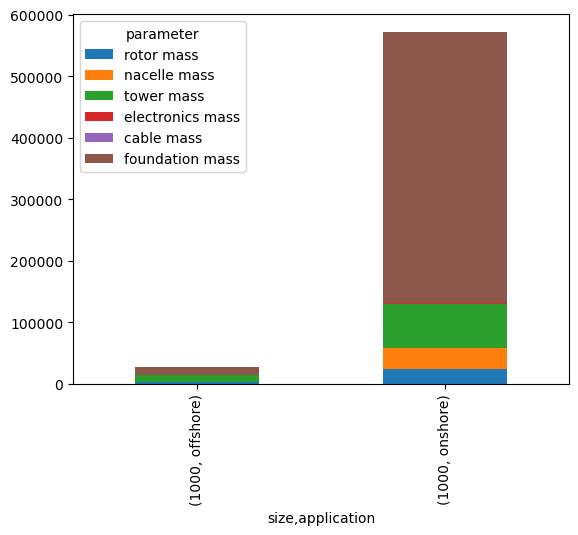

In [7]:
list_mass = [
    "rotor mass",
    "nacelle mass",
    "tower mass",
    "electronics mass",
    "cable mass",
    "foundation mass",
]
wt.array.sel(year=2020, value=0, parameter=list_mass).to_dataframe("val").unstack()["val"].plot(kind="bar", stacked=True)

In [24]:
wt.array.coords

Coordinates:
  * size         (size) <U6 '1000kW' '100kW' '3000kW' '500kW' '8000kW'
  * application  (application) <U8 'offshore' 'onshore'
  * parameter    (parameter) <U36 'access road' ... 'turbines per farm'
  * year         (year) int64 2000 2010 2020 2030 2040 2050
  * value        (value) int64 0

In [22]:
wt.array.sel(year=2020, value=0, parameter="maintenance transport").to_dataframe("val").unstack()["val"]

application,offshore,onshore
size,,
1000kW,256779.661017,6250.0
100kW,0.000000,6250.0
3000kW,256779.661017,6250.0
500kW,0.000000,6250.0
8000kW,256779.661017,6250.0


<AxesSubplot: >

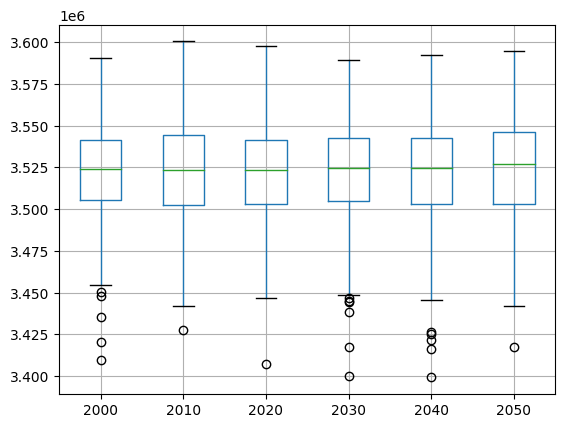

In [34]:
wt.array.sel(parameter="total mass", application="offshore", size="8000kW").to_dataframe("val").unstack()["val"].T.boxplot()

In [6]:
from windisch.model import func_tower_weight_d2h
func_tower_weight_d2h(5, 10, 3.03584782e-04, 9.68652909e00)

9762.425285500001

In [7]:
func_tower_weight_d2h(wt["rotor diameter"], wt["tower height"], 3.03584782e-04, 9.68652909e00)

<xarray.DataArray (size: 5, application: 2, year: 6, value: 1)>
array([[[[ 73374.90009306],
         [ 73374.90009306],
         [ 73374.90009306],
         [ 73374.90009306],
         [ 73374.90009306],
         [ 73374.90009306]],

        [[ 72712.91953994],
         [ 72712.91953994],
         [ 72712.91953994],
         [ 72712.91953994],
         [ 72712.91953994],
         [ 72712.91953994]]],


       [[[  9686.52909   ],
         [  9686.52909   ],
         [  9686.52909   ],
         [  9686.52909   ],
         [  9686.52909   ],
...
         [ 30434.02672168],
         [ 30434.02672168],
         [ 30434.02672168],
         [ 30434.02672168],
         [ 30434.02672168]]],


       [[[840467.97204929],
         [840467.97204929],
         [840467.97204929],
         [840467.97204929],
         [840467.97204929],
         [840467.97204929]],

        [[754455.95551841],
         [754455.95551841],
         [754455.95551841],
         [754455.95551841],
         [754455.95551841],
         [754455.95551841]]]])
Coordinates:
  * size         (size) <U6 '1000kW' '100kW' '3000kW' '500kW' '8000kW'
  * application  (application) <U8 'offshore' 'onshore'
  * year         (year) int64 2000 2010 2020 2030 2040 2050
  * value        (value) int64 0
    tower mass   (size, application, year, value) float64 7.337e+04 ... 7.545...

In [6]:
wt.array.sel(year=2020, value=0, parameter="tower mass")

<xarray.DataArray (size: 5, application: 2)>
array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])
Coordinates:
  * size         (size) <U6 '1000kW' '100kW' '3000kW' '500kW' '8000kW'
  * application  (application) <U8 'offshore' 'onshore'
    parameter    <U36 'tower mass'
    year         int64 2020
    value        int64 0